In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
!gdown 1bZH-EkQiQ5lSaQS1N0yGRMOiZq1YyPv8
!gdown 1vsl6VnxW2db5Ire6SQUufYV0PjbmlhOU

Downloading...
From (original): https://drive.google.com/uc?id=1bZH-EkQiQ5lSaQS1N0yGRMOiZq1YyPv8
From (redirected): https://drive.google.com/uc?id=1bZH-EkQiQ5lSaQS1N0yGRMOiZq1YyPv8&confirm=t&uuid=5be62918-5f7b-49a2-9651-01183bf783d3
To: /content/dataset.zip
100% 469M/469M [00:08<00:00, 55.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1vsl6VnxW2db5Ire6SQUufYV0PjbmlhOU
To: /content/haarcascades.zip
100% 189k/189k [00:00<00:00, 60.2MB/s]


In [4]:
!unzip dataset.zip
!unzip haarcascades.zip

Archive:  dataset.zip
   creating: dataset/
   creating: dataset/christian_bale/
  inflating: dataset/christian_bale/003ed280ff1003e4d9c3861a5e9ef3a88e-christian-bale.1x.rsquare.w1400.jpg  
  inflating: dataset/christian_bale/012716-christian-bale-birthday-9c1d054d8f07460fbe647fff721afaae.jpg  
  inflating: dataset/christian_bale/018142352b5fc6e1e12d663dc34d452a.jpg  
  inflating: dataset/christian_bale/0518-sm-bale.jpg  
  inflating: dataset/christian_bale/0699464.jpg  
  inflating: dataset/christian_bale/0x0 (1).jpg  
  inflating: dataset/christian_bale/0x0.jpg  
  inflating: dataset/christian_bale/102969-u2_auto=format&q=50&fit=crop&fm=pjpg&dpr=2&crop=faces&h=185.jpg  
  inflating: dataset/christian_bale/1200px-Christian_Bale_2009.jpg  
  inflating: dataset/christian_bale/12441_v9_bb.jpg  
  inflating: dataset/christian_bale/14723700.jpg  
  inflating: dataset/christian_bale/1522.jpg  
  inflating: dataset/christian_bale/1537538203339-laurie.jpg  
  inflating: dataset/christian_bale

In [5]:
url = "/content/dataset/christian_bale/003ed280ff1003e4d9c3861a5e9ef3a88e-christian-bale.1x.rsquare.w1400.jpg"
img = cv2.imread(url)
img.shape

(1400, 1400, 3)

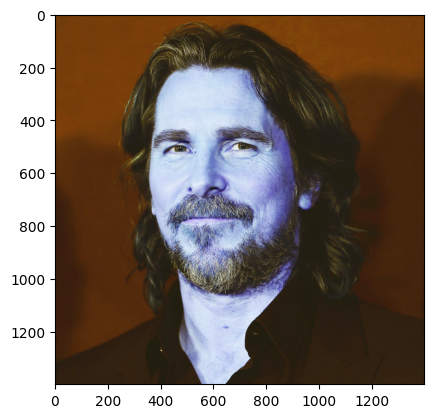

In [6]:
plt.imshow(img)

In [7]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1400, 1400)

In [8]:
gray

array([[52, 52, 52, ..., 50, 51, 51],
       [52, 52, 52, ..., 50, 51, 51],
       [52, 52, 52, ..., 50, 51, 51],
       ...,
       [29, 29, 29, ..., 32, 31, 31],
       [29, 29, 29, ..., 32, 31, 31],
       [29, 29, 29, ..., 32, 31, 31]], dtype=uint8)

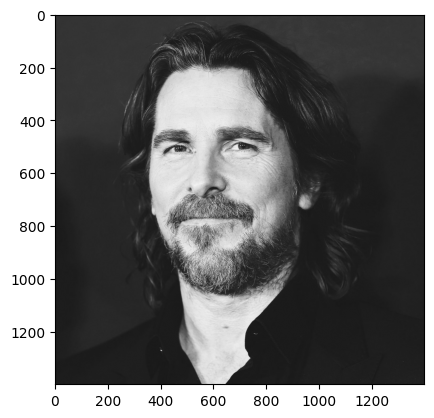

In [9]:
plt.imshow(gray, cmap='gray')

In [10]:
face_cascade = cv2.CascadeClassifier('/content/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/content/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[227, 211, 708, 708]], dtype=int32)

In [11]:
(x, y, w, h) = faces[0]
x, y, w, h

(np.int32(227), np.int32(211), np.int32(708), np.int32(708))

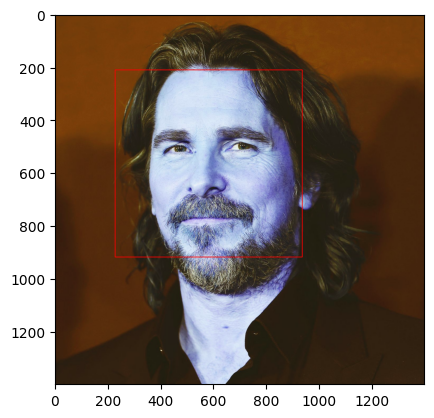

In [12]:
face_img = cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)
plt.imshow(face_img)

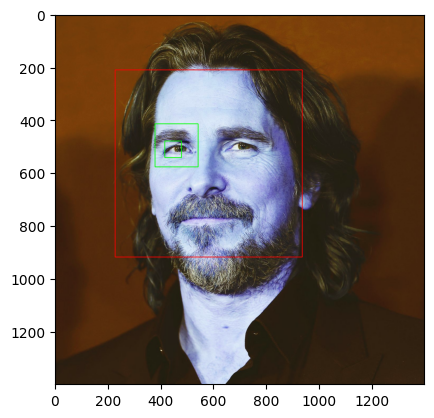

In [13]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

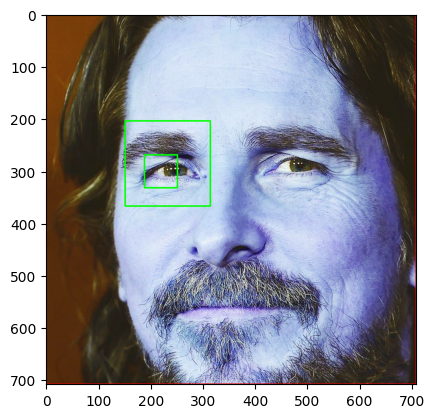

In [14]:
plt.imshow(roi_color, cmap='gray')

In [15]:
cropped_img = np.array(roi_color)
cropped_img.shape

(708, 708, 3)

In [16]:
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)
    imArray /= 255;
    # compute coefficients
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0;

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

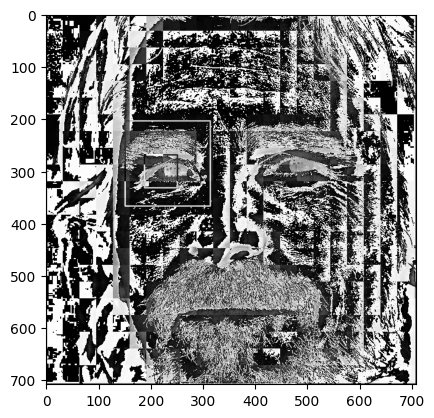

In [17]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [18]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is None: # Add this check
        return None
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

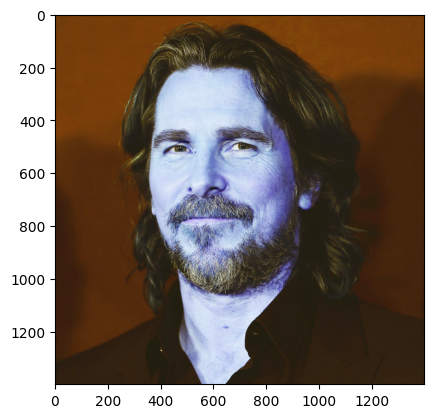

In [20]:
original_image = cv2.imread(url)
plt.imshow(original_image)

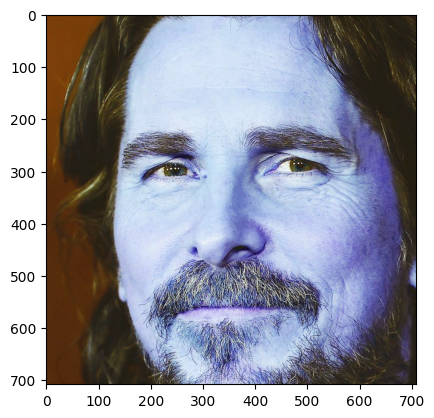

In [21]:
cropped_image = get_cropped_image_if_2_eyes(url)
plt.imshow(cropped_image)

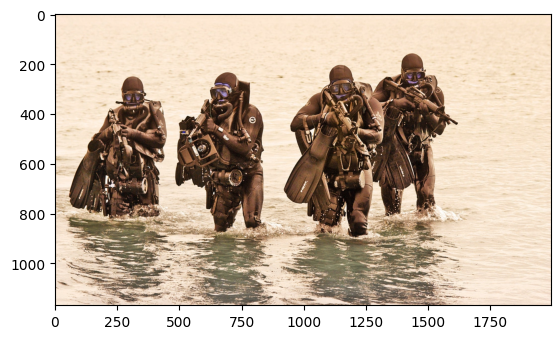

In [22]:
org_image_obstructed = cv2.imread("/content/dataset/david_goggins/1-jKGmj4FbeRxRJAm2otuDuw-1.jpg")
plt.imshow(org_image_obstructed)

In [23]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('/content/dataset/david_goggins/1-jKGmj4FbeRxRJAm2otuDuw-1.jpg')
cropped_image_no_2_eyes

In [24]:
path_to_data = "/content/dataset/"
path_to_cr_data = "/content/dataset_cropped/"

In [25]:
import os
image_dirs = []
for entry in os.scandir(path_to_data):
  if entry.is_dir():
    image_dirs.append(entry.path)

In [26]:
image_dirs

['/content/dataset/david_goggins',
 '/content/dataset/matthew_mcconaughey',
 '/content/dataset/christian_bale',
 '/content/dataset/hikaru_nakamura',
 '/content/dataset/magnus_carlsen']

In [27]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [28]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in image_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  /content/dataset_cropped/david_goggins
Generating cropped images in folder:  /content/dataset_cropped/matthew_mcconaughey
Generating cropped images in folder:  /content/dataset_cropped/christian_bale
Generating cropped images in folder:  /content/dataset_cropped/hikaru_nakamura
Generating cropped images in folder:  /content/dataset_cropped/magnus_carlsen


In [29]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'david_goggins': ['/content/dataset_cropped/david_goggins/david_goggins45.png',
  '/content/dataset_cropped/david_goggins/david_goggins59.png',
  '/content/dataset_cropped/david_goggins/david_goggins77.png',
  '/content/dataset_cropped/david_goggins/david_goggins20.png',
  '/content/dataset_cropped/david_goggins/david_goggins41.png',
  '/content/dataset_cropped/david_goggins/david_goggins55.png',
  '/content/dataset_cropped/david_goggins/david_goggins81.png',
  '/content/dataset_cropped/david_goggins/david_goggins36.png',
  '/content/dataset_cropped/david_goggins/david_goggins86.png',
  '/content/dataset_cropped/david_goggins/david_goggins79.png',
  '/content/dataset_cropped/david_goggins/david_goggins42.png',
  '/content/dataset_cropped/david_goggins/david_goggins92.png',
  '/content/dataset_cropped/david_goggins/david_goggins11.png',
  '/content/dataset_cropped/david_goggins/david_goggins91.png',
  '/content/dataset_cropped/david_goggins/david_goggins88.png',
  '/content/dataset_cro

In [30]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'david_goggins': 0,
 'matthew_mcconaughey': 1,
 'christian_bale': 2,
 'hikaru_nakamura': 3,
 'magnus_carlsen': 4}

In [31]:
import numpy as np
import pywt
import cv2
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)
    imArray /= 255;
    # compute coefficients
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0;

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [32]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [33]:
len(X[0])

4096

In [34]:
X[0]

array([[143],
       [159],
       [168],
       ...,
       [ 15],
       [ 15],
       [ 16]], dtype=uint8)

In [35]:
y[0]

0

In [36]:
X=np.array(X).reshape(len(X),4096).astype(float)
X.shape

(890, 4096)

In [37]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8071748878923767

In [39]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.67      0.74        24
           1       0.77      0.88      0.82        60
           2       0.79      0.79      0.79        61
           3       0.93      0.84      0.88        45
           4       0.76      0.76      0.76        33

    accuracy                           0.81       223
   macro avg       0.82      0.79      0.80       223
weighted avg       0.81      0.81      0.81       223



In [40]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [41]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [42]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

,model,best_score,best_params
0,svm,0.797688,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.602738,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.773684,{'logisticregression__C': 10}


In [43]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=10, multi_class='auto',
                                     solver='liblinear'))])}

In [44]:
best_estimators['svm'].score(X_test,y_test)

0.8116591928251121

In [45]:
best_estimators['random_forest'].score(X_test,y_test)

0.6278026905829597

In [46]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7982062780269058

In [47]:
best_clf = best_estimators['svm']

In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pipe.predict(X_test))
cm

array([[16,  4,  4,  0,  0],
       [ 1, 53,  5,  1,  0],
       [ 1,  9, 48,  0,  3],
       [ 0,  0,  2, 38,  5],
       [ 1,  3,  2,  2, 25]])

Text(95.72222222222221, 0.5, 'Truth')

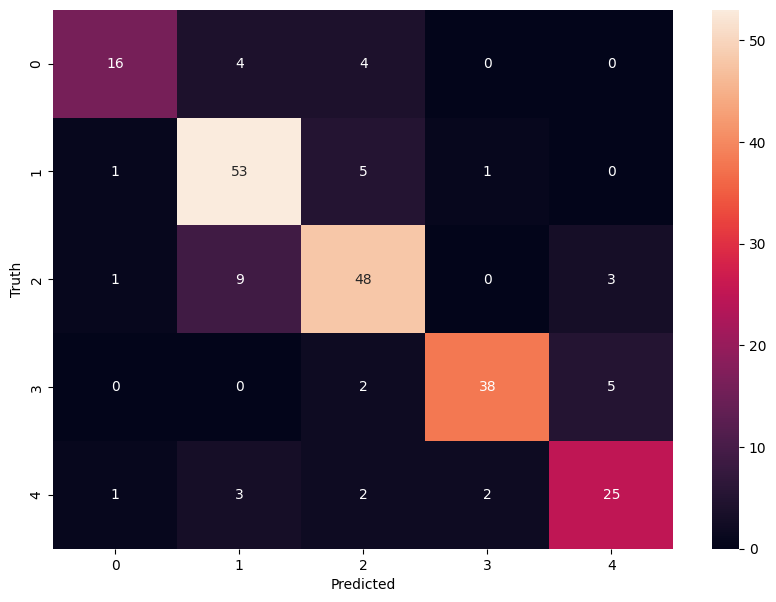

In [51]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [52]:
!pip install joblib
import joblib
# Save the model as a pickle in a file
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [53]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

In [54]:
!zip -r dataset_cropped.zip dataset_cropped

  adding: dataset_cropped/ (stored 0%)
  adding: dataset_cropped/david_goggins/ (stored 0%)
  adding: dataset_cropped/david_goggins/david_goggins45.png (deflated 5%)
  adding: dataset_cropped/david_goggins/david_goggins59.png (deflated 0%)
  adding: dataset_cropped/david_goggins/david_goggins77.png (deflated 14%)
  adding: dataset_cropped/david_goggins/david_goggins20.png (deflated 6%)
  adding: dataset_cropped/david_goggins/david_goggins41.png (deflated 13%)
  adding: dataset_cropped/david_goggins/david_goggins55.png (deflated 1%)
  adding: dataset_cropped/david_goggins/david_goggins81.png (deflated 2%)
  adding: dataset_cropped/david_goggins/david_goggins36.png (deflated 3%)
  adding: dataset_cropped/david_goggins/david_goggins86.png (deflated 11%)
  adding: dataset_cropped/david_goggins/david_goggins79.png (deflated 1%)
  adding: dataset_cropped/david_goggins/david_goggins42.png (deflated 1%)
  adding: dataset_cropped/david_goggins/david_goggins92.png (deflated 1%)
  adding: dataset